In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../data/covid19_usa.csv')
data.set_index('id', inplace=True)
data.head()

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,
NY0000000,2020-06-22,36103.0,40.883201,-72.801217,New York,NY,Suffolk,41010,1965
NY0000001,2020-06-22,36105.0,41.715795,-74.763946,New York,NY,Sullivan,1438,45
NC0000002,2020-06-22,37133.0,34.726074,-77.429082,North Carolina,NC,Onslow,221,3
ND0000003,2020-06-22,38001.0,46.096869,-102.528540,North Dakota,ND,Adams,0,0
OH0000004,2020-06-22,39063.0,41.002505,-83.668389,Ohio,OH,Hancock,63,5


In [3]:
data.isna().sum() 

Date                             0
FIPS                          7300
lat                              0
lon                              0
State                            0
Abbr                             0
City/County/Borough/Region       0
infected total                   0
death total                      0
dtype: int64

In [4]:
# show null rows of FIPS
data[data['FIPS'].isna()] # look a bit weird, but it's ok for now...

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,
UT0000161,2020-06-23,NaN,38.996171,-110.701396,Utah,UT,Southeast Utah,31,0
UT0000831,2020-06-16,NaN,41.271160,-111.914512,Utah,UT,Weber-Morgan,539,9
UT0001232,2020-06-14,NaN,39.372319,-111.575868,Utah,UT,Central Utah,75,0
UT0001619,2021-08-10,NaN,41.521068,-113.083282,Utah,UT,Bear River,23694,119
MI0002598,2021-07-16,NaN,0.000000,0.000000,Michigan,MI,Michigan Department of Corrections (MDOC),26760,153
...,...,...,...,...,...,...,...,...,...
MO2399602,2021-11-26,NaN,39.099700,-94.578600,Missouri,MO,Kansas City,66830,864
UT2399989,2021-11-02,NaN,39.372319,-111.575868,Utah,UT,Central Utah,13863,110
UT2400217,2021-11-04,NaN,40.124915,-109.517442,Utah,UT,TriCounty,8476,70


In [5]:
# show null rows of City/County/Borough/Region
data[data['City/County/Borough/Region'].isna()] # look a bit weird, but it's ok for now...

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,


***Conclusion:*** *We can see that there are some null values in the data, but it's ok for now...*

### Missing values is not a problem for now, but we will need to deal with it later.

## Clean data

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].describe()

count                          2338190
mean     2021-02-28 12:00:00.000000768
min                2020-03-01 00:00:00
25%                2020-08-30 00:00:00
50%                2021-02-28 12:00:00
75%                2021-08-30 00:00:00
max                2022-02-28 00:00:00
Name: Date, dtype: object

In [9]:
# some City/County/Borough/Region are not in the US
data[data['City/County/Borough/Region'].str.contains('out of', case=False)]

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,
MA0000102,2020-06-23,80025.0,0.0,0.0,Massachusetts,MA,Out of MA,0,0
CA0000180,2020-06-24,80006.0,0.0,0.0,California,CA,Out of CA,0,0
MS0000232,2020-06-24,80028.0,0.0,0.0,Mississippi,MS,Out of MS,0,0
OH0000256,2020-06-24,80039.0,0.0,0.0,Ohio,OH,Out of OH,0,0
ME0000354,2020-06-13,80023.0,0.0,0.0,Maine,ME,Out of ME,0,0
...,...,...,...,...,...,...,...,...,...
ND2401446,2022-02-20,80038.0,0.0,0.0,North Dakota,ND,Out of ND,0,0
DE2401493,2022-02-21,80010.0,0.0,0.0,Delaware,DE,Out of DE,0,0
LA2401637,2022-02-22,80022.0,0.0,0.0,Louisiana,LA,Out of LA,0,0


what is the meaning of 'out of'?

***Conclusion:*** *We can see that there are some rows that are not in the US, remove them.*


In [10]:
data = data[~data['City/County/Borough/Region'].str.contains('out of', case=False)]
# check again
data[data['City/County/Borough/Region'].str.contains('out of', case=False)]

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,


### some location is not real

In [12]:
# if lat or lon is 0, then it's not a real location
data[(data['lat'] == 0) | (data['lon'] == 0)]

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,
MI0002598,2021-07-16,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),26760,153
MI0005325,2020-05-14,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),2257,56
MI0005902,2020-05-11,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),2169,54
MI0008348,2021-05-26,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),26863,150
MI0011213,2021-07-01,NaN,0.0,0.0,Michigan,MI,Federal Correctional Institution (FCI),320,5
...,...,...,...,...,...,...,...,...,...
MI2384996,2021-12-20,NaN,0.0,0.0,Michigan,MI,Federal Correctional Institution (FCI),321,5
MI2385690,2021-12-23,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),28542,163
MI2386617,2021-10-16,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),27162,153


### Where are these locations? 

***Conclusion:*** *We can see that there are some rows that are the lat or lon is 0, remove them.*


In [13]:
data = data[(data['lat'] != 0) & (data['lon'] != 0)]
# check again
data[(data['lat'] == 0) | (data['lon'] == 0)]

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,


### try to find the location of the null FIPS

In [14]:
data[data['FIPS'].isna()]

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,
UT0000161,2020-06-23,NaN,38.996171,-110.701396,Utah,UT,Southeast Utah,31,0
UT0000831,2020-06-16,NaN,41.271160,-111.914512,Utah,UT,Weber-Morgan,539,9
UT0001232,2020-06-14,NaN,39.372319,-111.575868,Utah,UT,Central Utah,75,0
UT0001619,2021-08-10,NaN,41.521068,-113.083282,Utah,UT,Bear River,23694,119
MO0003056,2021-08-01,NaN,39.099700,-94.578600,Missouri,MO,Kansas City,49760,620
...,...,...,...,...,...,...,...,...,...
MO2399602,2021-11-26,NaN,39.099700,-94.578600,Missouri,MO,Kansas City,66830,864
UT2399989,2021-11-02,NaN,39.372319,-111.575868,Utah,UT,Central Utah,13863,110
UT2400217,2021-11-04,NaN,40.124915,-109.517442,Utah,UT,TriCounty,8476,70


### Where are these locations?

***Conclusion:*** *We can see that there are some rows that are the FIPS is null, it's ok for now...*

### About negative values?

infected total and death total should not be negative

In [17]:
# check infected total
data[data['infected total'] < 0] # ok, not have negative values

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,


In [18]:
# check death total
data[data['death total'] < 0] # ok, not have negative values

,Date,FIPS,lat,lon,State,Abbr,City/County/Borough/Region,infected total,death total
id,,,,,,,,,


### How about City/County/Borough/Region? some of them are not in the US?


In [21]:
# check a City/County/Borough/Region list all of them
data['City/County/Borough/Region'].nunique() # 1848 too many, we can't check them one by one
# it's ok for now...

1848

In [6]:
# data.to_csv('../../data/clean_data.csv')

### Outliers detection

how to detect outliers?

In [22]:
# try to find outliers by plot graph
# get sample data
sample_data = data.sample(1000)

### infected total

<Axes: xlabel='Date', ylabel='infected total'>

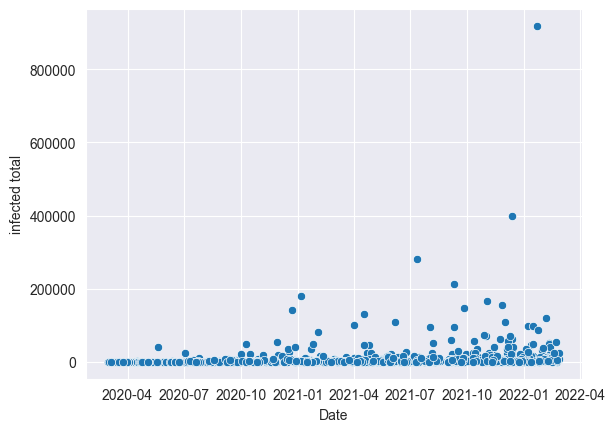

In [23]:
# plot infected total
import seaborn as sns
sns.scatterplot(x='Date', y='infected total', data=sample_data)


It seems that there are some outliers in the infected total, but we can't just remove them, because we need to check the data again later.

we need to check the data again later.

# try with all 
### infected total


<Axes: xlabel='Date', ylabel='infected total'>

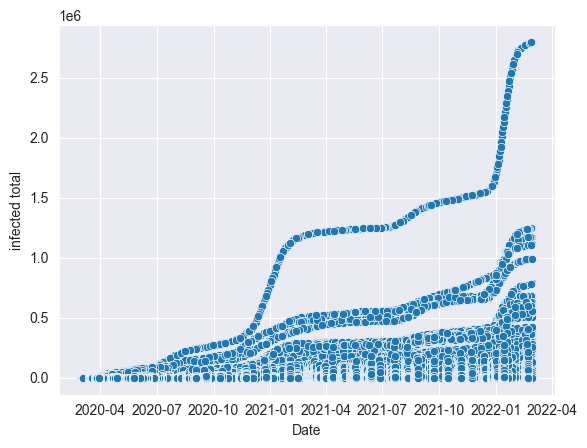

In [24]:
# plot infected total
sns.scatterplot(x='Date', y='infected total', data=data)


you can see from this it not a outlier, it's just a big number, so we can't remove it.

### death total?

<Axes: xlabel='Date', ylabel='death total'>

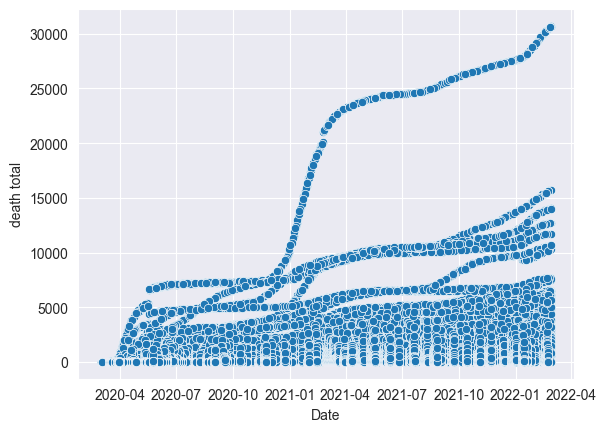

In [26]:
sns.scatterplot(x='Date', y='death total', data=data)

***Conclusion:*** *from now we assume that there are no outliers in the data.*

In [27]:
# save clean data
data.to_csv('../../data/clean_data.csv')